In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
down_payment_fraction = 0.1

# Arlington
tax_rate = 1.126 * 1e-2

num_years = 30
interest_rate = 0.04
num_months = num_years * 12

total_price = 550000
down_payment = total_price * down_payment_fraction

principal = total_price - down_payment

print "Total price: {:,}".format(total_price)
print "Down payment: {:,}".format(down_payment)
print "Principal loan: {:,}".format(down_payment)


r = interest_rate
alpha = r / 12.
N = num_months
P = principal

total_tax = tax_rate * total_price * num_years
total_loan_repayment = total(P,N,alpha)
grand_total = total_loan_repayment + total_tax
print "Total loan payment : {:,}".format(total_loan_repayment)
print "Total tax payed : {:,}".format(total_tax)
print "Gran total : {:,}".format(grand_total)

print "monthly payment : {:,.0f}".format(f(P, N, alpha))

Total price: 550,000
Down payment: 55,000.0
Principal loan: 55,000.0
Total loan payment : 850,754.056519
Total tax payed : 185,790.0
Gran total : 1,036,544.05652
monthly payment : 2,363


In [73]:
(total(P,N,alpha) - total_price) / N

835.4279347762188

In [74]:
def p(k, P, N, alpha):
    '''
    Outstanding amount at step k
    '''
    A = P * ( np.power(1 + alpha, k))
    A -=  P * np.power(1 + alpha, N) * (np.power(1 + alpha, k) -1) / (np.power(1 + alpha, N) -1)
    return A

def I(k, P, N, alpha):
    return alpha * P * ( np.power(1 + alpha, k) - np.power(1 + alpha, N) )
 
    
def f(P, N, alpha):
    return alpha * np.power(1 + alpha, N) * P / (np.power(1 + alpha, N) - 1)


def X(k, P, N, alpha):
    return f(k, P, N, alpha) - alpha * p( k, p, N, alpha)

def total(P, N, alpha):
    return N * f(P, N, alpha)

In [75]:
ns = np.arange(N)
ys = ns / 12.
ps = p(ns, P, N, alpha)
    

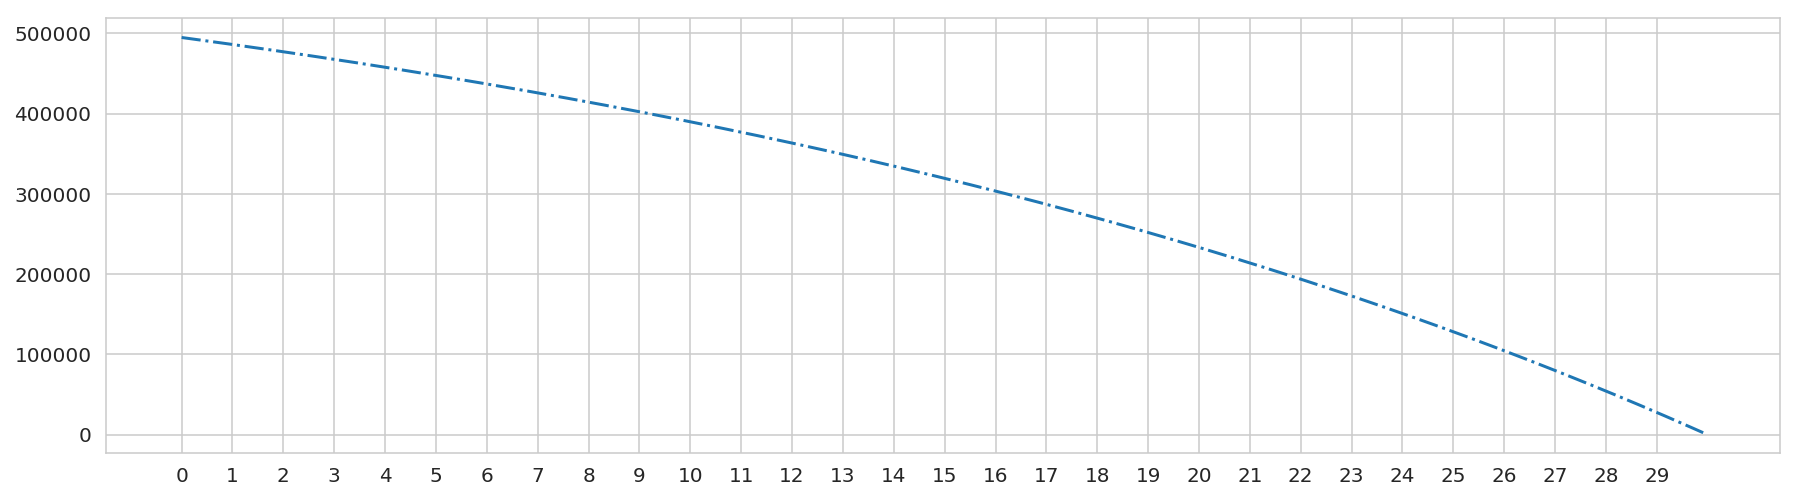

In [78]:
plt.figure(figsize=(15,4))
with sns.axes_style('whitegrid'):
    plt.plot(ys, ps, '-.') 
    plt.xticks(np.arange(N/12))
    plt.ticklabel_format(style="sci")